## Functional API Implementation
## Ch 7. Deep Learning w/ Python
### Gamze Keçibaş
---
### CONTENT
- **Step 01.** Import libraries  
- **Step 02.** Define dataset
- **Step 03.** Build the model
    - **Step 03.1** Shared Input Layers (SIL)
    - **Step 03.2** Shared Feature Extraction Layers (SFEL)

**Step 01.** Import libraries

In [28]:
# Step 01. Import libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Step 02.** Define dataset

In [29]:
(x_train_CNN, y_train_CNN), (x_test_CNN, y_test_CNN) = keras.datasets.mnist.load_data()
assert x_train_CNN.shape == (60000, 28, 28)
assert x_test_CNN.shape == (10000, 28, 28)
assert y_train_CNN.shape == (60000,)
assert y_test_CNN.shape == (10000,)

#for RNN
max_features= 10000
max_len= 500

(input_train_RNN, y_train_RNN), (input_test_RNN, y_test_RNN)= keras.datasets.imdb.load_data(num_words=max_features)
print(len(input_train_RNN), 'Train Sequences')
print(len(input_test_RNN), 'Test Sequences')
print('\nPad Sequences (samples x time)')
input_train_RNN= sequence.pad_sequences(input_train_RNN, maxlen= max_len)
input_test_RNN= sequence.pad_sequences(input_test_RNN, maxlen= max_len)
print('input_train shape: ', input_train_RNN.shape)
print('input_test shape: ', input_test_RNN.shape)

25000 Train Sequences
25000 Test Sequences

Pad Sequences (samples x time)
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


**Step 03. Build the model**  
><code>input= layers.Input(shape=(2,))  
> hidden= Dense(2)(input)  
> model= Model(inputs= input, outputs= hidden) <code> 
    
* **Step 03.1** Shared Input Layers (SIL)

In [20]:
input_SIL= tf.keras.layers.Input(shape=(28,28,1))

#1st CNN submodel
conv1_SIL= tf.keras.layers.Conv2D(16, kernel_size= 2, activation='relu')(input_SIL)
batch1_SIL= tf.keras.layers.BatchNormalization(axis=-1, momentum=0.95, epsilon=0.005)(conv1_SIL)
pool1_SIL= tf.keras.layers.MaxPooling2D(2,2)(batch1_SIL)
flat1_SIL= tf.keras.layers.Flatten()(pool1_SIL)

#2nd CNN submodel
conv2_SIL= tf.keras.layers.Conv2D(8, kernel_size= 4, activation='relu')(input_SIL)
batch2_SIL= tf.keras.layers.BatchNormalization(axis=-1, momentum=0.95, epsilon=0.005)(conv2_SIL)
pool2_SIL= tf.keras.layers.MaxPooling2D(2,2)(batch2_SIL)
flat2_SIL= tf.keras.layers.Flatten()(pool2_SIL)

#Merging
merge_SIL= tf.keras.layers.concatenate([flat1_SIL, flat2_SIL])

#Interpretation layer
batch3_SIL= tf.keras.layers.BatchNormalization(axis=-1, momentum=0.95, epsilon=0.005)(merge_SIL)
hidden_SIL= tf.keras.layers.Dense(10, activation='relu')(batch3_SIL)

output_SIL= tf.keras.layers.Dense(1, activation= 'sigmoid')(hidden_SIL)

model_SIL= tf.keras.models.Model(inputs= input_SIL, outputs= output_SIL)
print(model_SIL.summary())

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 27, 27, 16)   80          input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 25, 25, 8)    136         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 27, 27, 16)   64          conv2d_12[0][0]                  
____________________________________________________________________________________________

* **There is additional BatchNormalization() layers**  
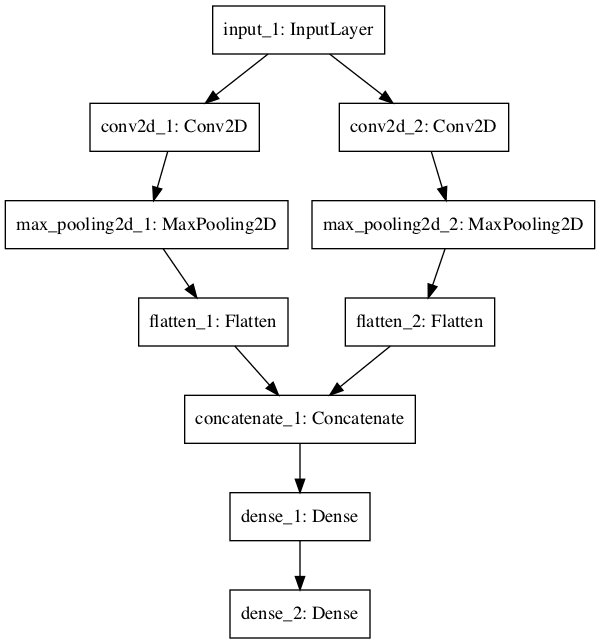

In [22]:
model_SIL.compile(optimizer= keras.optimizers.RMSprop(), 
              loss= keras.losses.binary_crossentropy,
              metrics= ['acc'])
history_SIL= model_SIL.fit(x_train_CNN, y_train_CNN,
                  epochs=4, validation_split= 0.2)

loss_SIL = history_SIL.history["loss"]
val_loss_SIL = history_SIL.history["val_loss"]
acc_SIL = history_SIL.history["acc"]
val_acc_SIL = history_SIL.history["val_acc"]

Epoch 1/4
1500/1500 [==============================] - 20s 12ms/step - loss: -15719358.0000 - acc: 0.1140 - val_loss: -22157940.0000 - val_acc: 0.1060
Epoch 2/4
1500/1500 [==============================] - 19s 13ms/step - loss: -30332120.0000 - acc: 0.1140 - val_loss: -40240512.0000 - val_acc: 0.1060
Epoch 3/4
1500/1500 [==============================] - 19s 13ms/step - loss: -52072308.0000 - acc: 0.1140 - val_loss: -65855192.0000 - val_acc: 0.1060
Epoch 4/4
1500/1500 [==============================] - 19s 12ms/step - loss: -82208224.0000 - acc: 0.1140 - val_loss: -101446648.0000 - val_acc: 0.1060


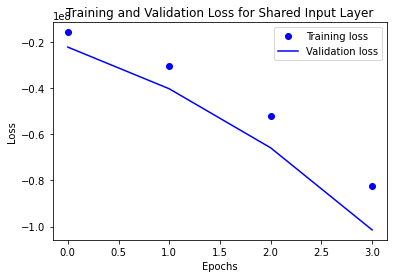

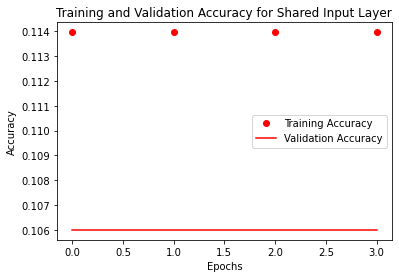

In [23]:
plt.figure()
plt.plot(range(4), loss_SIL, "bo", label="Training loss")
plt.plot(range(4), val_loss_SIL, "b", label="Validation loss")
plt.title("Training and Validation Loss for Shared Input Layer")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(range(4), acc_SIL, "ro", label="Training Accuracy")
plt.plot(range(4), val_acc_SIL, "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy for Shared Input Layer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

* **Step 03.2** Shared Feature Extraction Layer (SFE)

In [53]:
input_SFE= tf.keras.layers.Input(shape=(32,500))

# feature extraction
extract1_SFE= tf.keras.layers.LSTM(10, return_sequences=True)(input_SFE)

# 1st interpretation model
interp11_SFE= tf.keras.layers.Dense(10, activation='relu')(extract1_SFE)
# 2nd interpretation model
interp21_SFE= tf.keras.layers.Dense(10, activation='relu')(extract1_SFE)
interp22_SFE= tf.keras.layers.Dense(20, activation='relu')(interp21_SFE)
interp23_SFE= tf.keras.layers.Dense(10, activation='relu')(interp22_SFE)

# merge interpretation
merge_SFE= tf.keras.layers.concatenate([interp11_SFE, interp23_SFE])

# output
out_SFE= tf.keras.layers.Dense(1, activation='sigmoid')(merge_SFE)
model_SFE= tf.keras.models.Model(inputs= input_SFE, outputs= out_SFE)
model_SFE.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 32, 500)]    0                                            
__________________________________________________________________________________________________
lstm_15 (LSTM)                  (None, 32, 10)       20440       input_24[0][0]                   
__________________________________________________________________________________________________
dense_64 (Dense)                (None, 32, 10)       110         lstm_15[0][0]                    
__________________________________________________________________________________________________
dense_65 (Dense)                (None, 32, 20)       220         dense_64[0][0]                   
___________________________________________________________________________________________

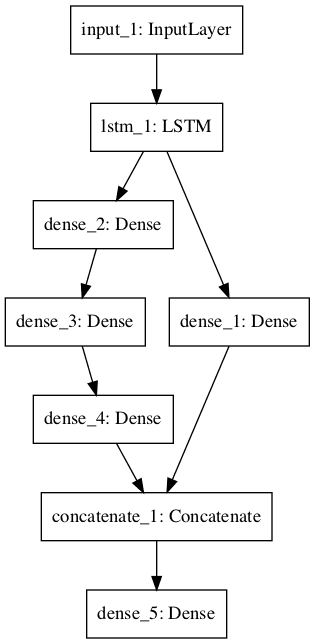

* **Step 03.3** Multiple Input and Output Models

In [63]:
# 1st input

input_mi1= tf.keras.layers.Input(shape=(28,28,1))

conv_mi11 = tf.keras.layers.Conv2D(32, kernel_size=4, activation='relu')(input_mi1)
pool_mi11 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv_mi11)
conv_mi12 = tf.keras.layers.Conv2D(16, kernel_size=4, activation='relu')(pool_mi11)
pool_mi12 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv_mi12)
flat_mi1 = tf.keras.layers.Flatten()(pool_mi12)
batch_mi1= tf.keras.layers.BatchNormalization(axis=-1, momentum=0.95, epsilon=0.005)(flat_mi1)
drop_mi1= tf.keras.layers.Dropout(0.5)(batch_mi1)
# second input model
input_mi2 = tf.keras.layers.Input(shape=(28,28,1))

conv_mi21 = tf.keras.layers.Conv2D(32, kernel_size=4, activation='relu')(input_mi2)
pool_mi21 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv_mi21)
conv_mi22 = tf.keras.layers.Conv2D(16, kernel_size=4, activation='relu')(pool_mi21)
pool_mi22 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv_mi22)
flat_mi2 = tf.keras.layers.Flatten()(pool_mi22)
batch_mi2= tf.keras.layers.BatchNormalization(axis=-1, momentum=0.95, epsilon=0.005)(flat_mi2)
drop_mi2= tf.keras.layers.Dropout(0.5)(batch_mi2)
# merge input models
merge_mi = tf.keras.layers.concatenate([drop_mi1, drop_mi2])

# interpretation model
hidden_mi1 = tf.keras.layers.Dense(10, activation='relu')(merge_mi)
hidden_mi2 = tf.keras.layers.Dense(10, activation='relu')(hidden_mi1)
out_mi = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_mi2)
model_mi = tf.keras.models.Model(inputs=[input_mi1, input_mi2], outputs=out_mi)
# summarize layers
print(model_mi.summary())

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_35 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_36 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 25, 25, 32)   544         input_35[0][0]                   
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 25, 25, 32)   544         input_36[0][0]                   
___________________________________________________________________________________________

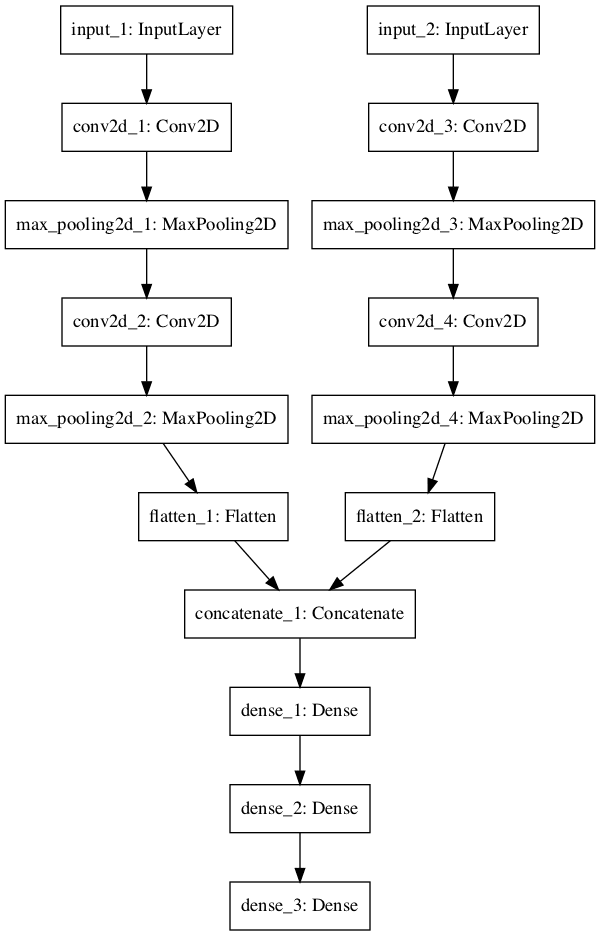

* **Step 03.4** Multiple Output Models

In [68]:
# input layer
input_mo = tf.keras.layers.Input(shape=(100,1))
# feature extraction
extract_mo = tf.keras.layers.LSTM(10, return_sequences=True)(input_mo)
# classification output
class11_mo = tf.keras.layers.LSTM(10)(extract_mo)
class12_mo = tf.keras.layers.Dense(10, activation='relu')(class11_mo)
output1_mo = tf.keras.layers.Dense(1, activation='sigmoid')(class12_mo)
# sequence output
output2_mo = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='linear'))(extract_mo)
# output
model_mo = tf.keras.models.Model(inputs=input_mo, outputs=[output1_mo, output2_mo])
# summarize layers
print(model_mo.summary())

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
lstm_22 (LSTM)                  (None, 100, 10)      480         input_40[0][0]                   
__________________________________________________________________________________________________
lstm_23 (LSTM)                  (None, 10)           840         lstm_22[0][0]                    
__________________________________________________________________________________________________
dense_93 (Dense)                (None, 10)           110         lstm_23[0][0]                    
___________________________________________________________________________________________

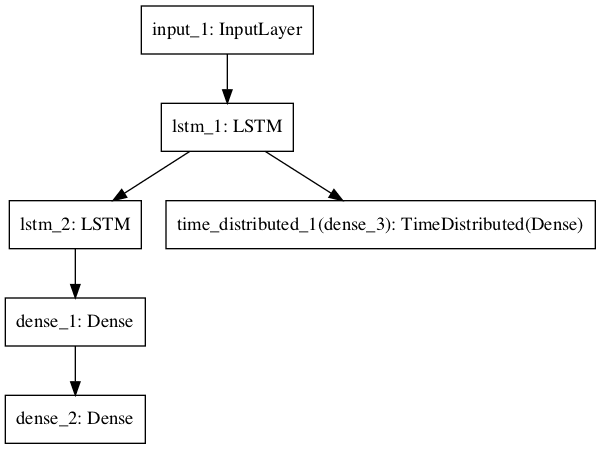